In [1]:
from manim import *
from scipy.optimize import root
from more_itertools import repeatfunc
from random import randint

b_light = YELLOW_A #"#e7dfa6"
b_red = MAROON_A #"#ed947c"

config.background_color = "#080833"

Manim Community v0.17.3

In [2]:
config.media_width = "70%"
config.verbosity = "WARNING"

In [3]:
def logistic(y, r=3.9):
    return r*y*(1-y)

pts3 = [0.18098600645106025]
for i in range(3):
    pts3 += [logistic(pts3[-1])]
print(pts3)

c = 0.7435897435897444

def logisticpower(n,y):
    for i in range(n):
        y = logistic(y)
    return y

sol = root(lambda y: logisticpower(1,y)-y, .8)
print(sol)
print(sol.x[0])

periodic = [0.7435897435897436, 
            0.35897435897435914, 
            0.5780972804878335, 
            0.6195076919497793, 
            0.23736827282885084,
            0.5460917791915939, 
            0.5289273611277906, 
            0.5927377530773453,
            0.7710049893190077,
            0.5155611776250768]

[0.18098600645106025, 0.5780972804878324, 0.9512131776435788, 0.18098600645105828]
    fjac: array([[-1.]])
     fun: array([-2.33146835e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.31788136e-09])
       r: array([2.90000506])
  status: 1
 success: True
       x: array([0.74358974])
0.7435897435897444


In [4]:
config.tex_template = TexFontTemplates.urw_avant_garde

def inverse_logistic(endpts,right=True):
    """Look for inverse image of interval defined by endpts"""
    a,b = endpts
    ainv = root(lambda y: logistic(y)-a, int(right)).x[0]
    binv = root(lambda y: logistic(y)-b, int(right)).x[0]
    out = [ainv,binv]
    out.sort()
    return out

def get_axes(width = 12, height=5, time = 25, show_ticks=False):
    axes = Axes(
                x_range=[0, time, 2*time],#x_range=[0, time, time],
                y_range=[0, 1.2, 1.5],#y_range=[0, 1.3, 1],
                x_length = width,
                y_length = height,
            ).set_color(b_light)
    axes.to_edge(LEFT, buff=1).shift(.3*UP)
    x_label = axes.get_x_axis_label("\\text{time}", edge=DR, direction=DL).set_color(b_light)
    y_label = axes.get_y_axis_label("\\text{population}").set_color(b_light)
    out = [axes,VGroup(x_label,y_label)]
    if show_ticks:
        abc = [Tex(r"$a$").move_to(axes.coords_to_point(-1,pts3[0])),
                Tex(r"$b$").move_to(axes.coords_to_point(-1,pts3[1])),
                Tex(r"$c$").move_to(axes.coords_to_point(-1,pts3[2])),
                ]
        ticks = [Line(axes.coords_to_point(-.3,pts3[i]),axes.coords_to_point(.3,pts3[i]), stroke_width=1) for i in range(3)]
        out += [VGroup(*ticks,*abc).set_color(b_light)]
    return out

def get_cobweb_axes(width = 5, F = lambda x: logistic(x,3.9), show_graph=False, show_braces=False, label=MathTex("F(x)")):
    config.tex_template = TexFontTemplates.urw_avant_garde
    axes = Axes(
                x_range=[0.0, 1.2, 1.2],
                y_range=[0.0, 1.2, 1.2],
                x_length=width,
                y_length=width
            ).set_color(b_light)
    axes.to_edge(RIGHT, buff=1).shift(.3*UP)
    x_label = axes.get_x_axis_label("x", edge=DR, direction=DL).set_color(b_red)
    y_label = axes.get_y_axis_label(label).set_color(b_red)
    out = [axes,VGroup(x_label,y_label)]
    if show_graph:
        graph = axes.plot(F, color=b_red, x_range = [0,1])        
        diagonal = Line(axes.coords_to_point(0,0), axes.coords_to_point(1,1), stroke_color=b_light,stroke_width=2)
        path = []
        for i in range(3):
            path += [Line(axes.coords_to_point(pts3[i],pts3[i]), axes.coords_to_point(pts3[i],pts3[i+1]), stroke_width=2, stroke_color=YELLOW)]
            path += [Line(axes.coords_to_point(pts3[i],pts3[i+1]), axes.coords_to_point(pts3[i+1],pts3[i+1]), stroke_width=2, stroke_color=YELLOW)]
        out += [VGroup(graph,diagonal,*path)]
        if show_braces:
            abc = [Tex(r"$a$").move_to(axes.coords_to_point(pts3[0],-.1)),
                  Tex(r"$a$").move_to(axes.coords_to_point(-.1,pts3[0])),
                  Tex(r"$b$").move_to(axes.coords_to_point(pts3[1],-.1)),
                  Tex(r"$b$").move_to(axes.coords_to_point(-.1,pts3[1])),
                  Tex(r"$c$").move_to(axes.coords_to_point(pts3[2],-.1)),
                  Tex(r"$c$").move_to(axes.coords_to_point(-.1,pts3[2])),
                  ]
            ticks = [Line(axes.coords_to_point(pts3[i],.03),axes.coords_to_point(pts3[i],-.03), stroke_width=1) for i in range(3)]
            ticks += [Line(axes.coords_to_point(-.03,pts3[i]),axes.coords_to_point(.03,pts3[i]), stroke_width=1) for i in range(3)]
            out += [VGroup(*ticks,*abc).set_color(b_light)]
    return out

def FocusBar(obj,direction=LEFT):
    dots = VGroup(Dot(obj.get_corner(UL)), Dot().to_corner(UL,buff=0), Dot().to_corner(UR,buff=0))
    upper = SurroundingRectangle(dots, fill_color=BLACK, fill_opacity=.5, stroke_width=0, buff=-.1)
    dots = VGroup(Dot(obj.get_corner(DR)), Dot().to_corner(DL,buff=0), Dot().to_corner(DR,buff=0))
    lower = SurroundingRectangle(dots, fill_color=BLACK, fill_opacity=.5, stroke_width=0, buff=-.1)
    return VGroup(upper,lower)

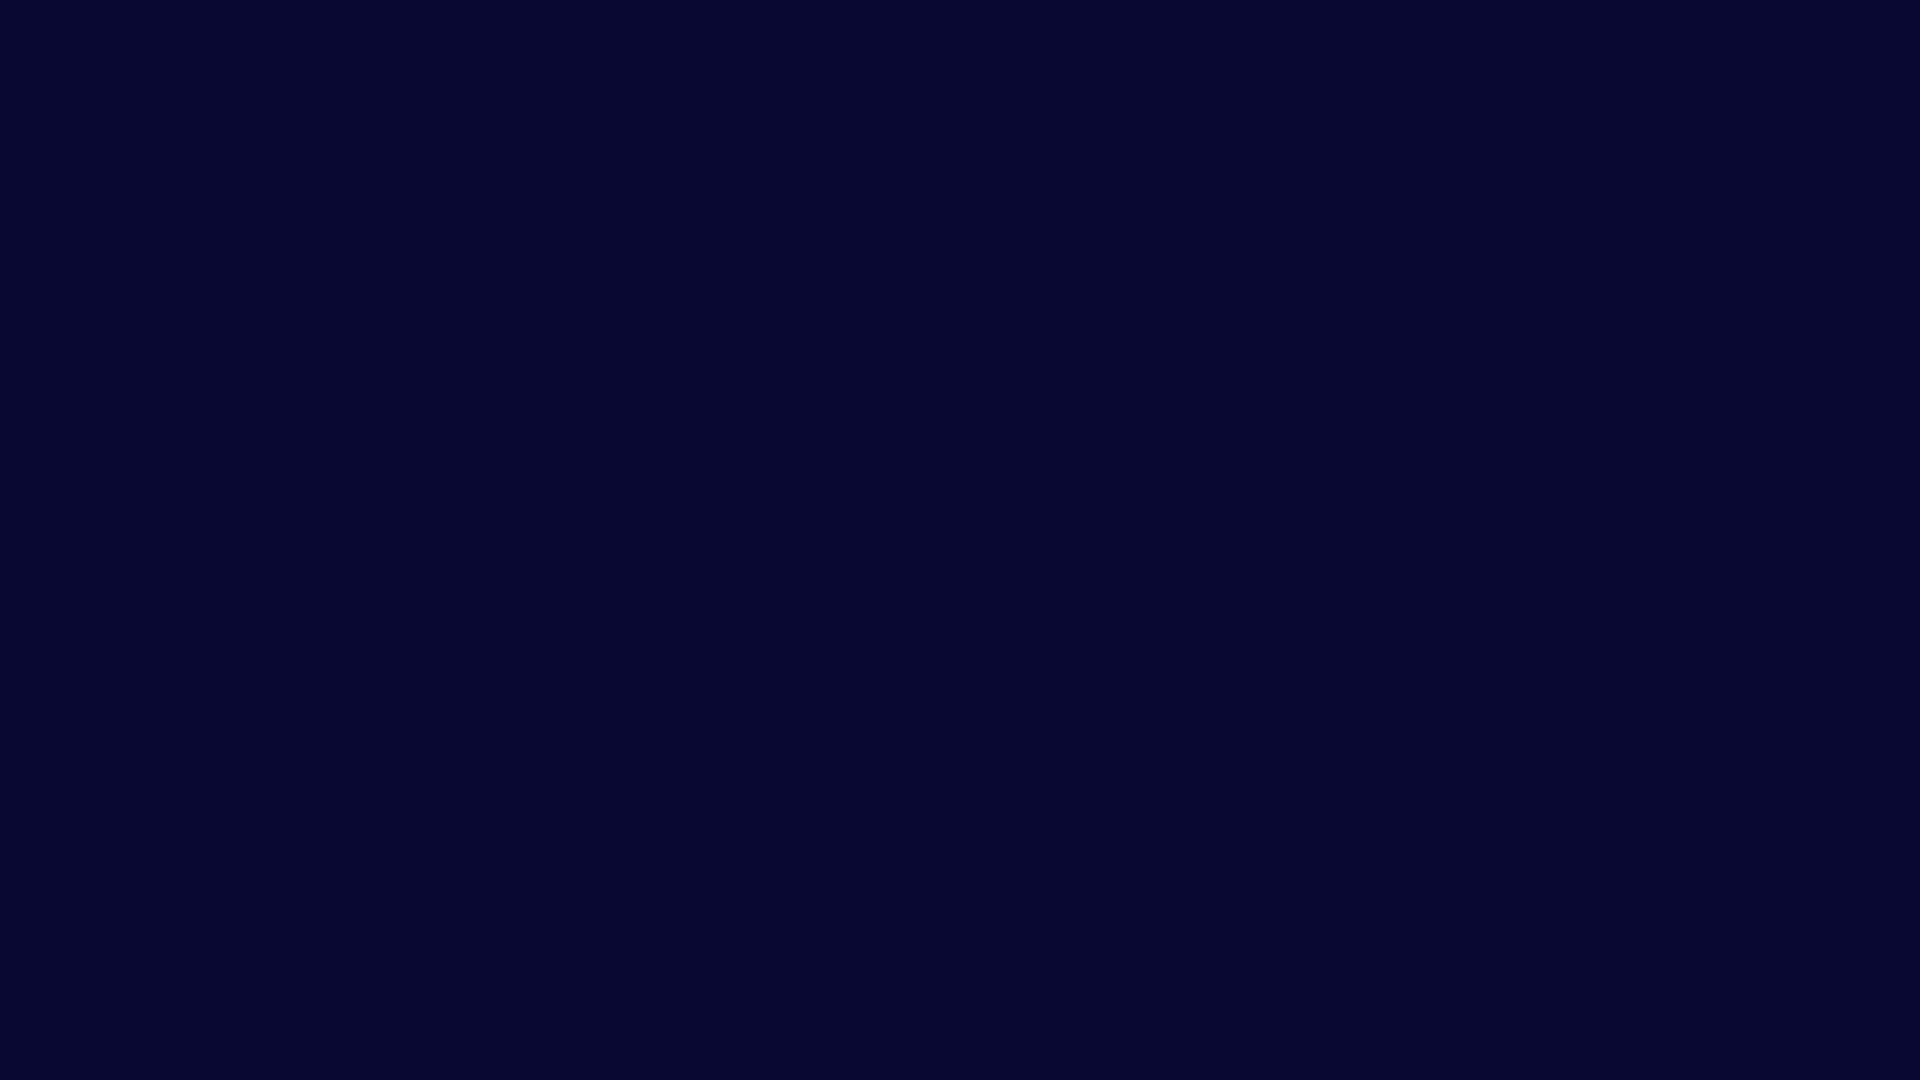

In [9]:
%%manim -qh Blank
config.tex_template = TexFontTemplates.urw_avant_garde

class Blank(Scene):
    def construct(self):
        text = Tex("").set_color(b_red).scale(2)
        self.add(text)

In [11]:
%%manim -qh D0_Recap
config.tex_template = TexFontTemplates.urw_avant_garde

class D0_Recap(Scene):
    def construct(self):
        t1 = Tex("Logistic Map").shift(UP).shift(3*LEFT)
        t2a = MathTex("F(x) = ")
        t2b = MathTex("r").next_to(t2a,RIGHT, buff=.3)
        t2bb = MathTex("3.9").next_to(t2a,RIGHT, buff=.1)
        t2c = MathTex("x \, (1-x)").next_to(t2bb,RIGHT, buff=.1)
        
        VGroup(t2a,t2b,t2bb,t2c).next_to(t1,DOWN, buff=1)
        
        self.wait(2)
        self.play(Write(t1),run_time=2)
        self.play(Write(t2a), run_time=2)
        self.play(Write(t2b))
        self.play(Write(t2c), run_time=2)
        self.wait(8)
                
        r_axes,r_labels,graph = get_cobweb_axes(show_graph=True) 
        
        self.play(Create(r_axes))
        self.play(Write(r_labels))
        self.play(Create(graph[0]))
        self.wait()
        self.play(Transform(t2b,t2bb))
        self.wait(15)

In [10]:
%%manim -qh D1_PopVsTime
config.tex_template = TexFontTemplates.urw_avant_garde

class D1_PopVsTime(Scene):
    def construct(self):
        h=.1
        pts = [.6]
        y = pts[-1]

        axes,labels = get_axes(height=4)
        axes.shift(DOWN)
        labels.shift(DOWN)
        
        butterfly = ImageMobject("butterfly.png").scale(.07).move_to(axes.coords_to_point(1,1.5))
        def get_butterflies(n):
            xlocs = [0] + [(i+np.random.normal()/2)*2/3 for i in range(n-1)]
            ylocs = np.random.uniform(size = n)
            return [butterfly.copy().shift(xlocs[i]*RIGHT + ylocs[i]*UP).rotate(np.random.normal(0,.2)) for i in range(n)]
        butterflies = get_butterflies(int(20*y))
        
        self.add(*butterflies)
        self.add(axes,labels)
        
        self.add(Dot(axes.coords_to_point(0,pts[-1])))
        for i in range(22):
            y = pts[-1]
            ynew = logistic(y)
            pts += [ynew]
            self.wait(.5)
            self.add(Dot(axes.coords_to_point(i+1,pts[-1])))
            self.remove(*butterflies)
            butterflies = get_butterflies(int(20*ynew))
            self.add(*butterflies)
            self.add(Line(axes.coords_to_point(i,pts[-2]),axes.coords_to_point(i+1,pts[-1])).set_opacity(.5))
        self.wait(5)

In [14]:
%%manim -qh D2_Periodic
config.tex_template = TexFontTemplates.urw_avant_garde

class D2_Periodic(Scene):
    def construct(self):
        rt = [7,14,5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5]
        k=0

        axes,labels = get_axes()
        self.wait()
        self.play(Create(VGroup(axes,labels)),run_time=2)
        
        text = [Tex(str(i) + "-periodic").to_corner(RIGHT+UP, buff=1.2) for i in range(12)]
        
        for pt in periodic[:10]:
            self.add(axes,labels)
            pts = [pt]
            y = pts[-1]

            self.add(Dot(axes.coords_to_point(0,pts[-1])))
            graph_elements = []
            for i in range(22):
                y = pts[-1]
                if pt == 0.7435897435897436:
                    ynew = pt
                else:
                    ynew = logistic(y)
                pts += [ynew]
                graph_elements += [VGroup(Line(axes.coords_to_point(i,pts[-2]),axes.coords_to_point(i+1,pts[-1])).set_opacity(.5),
                                  Dot(axes.coords_to_point(i+1,pts[-1])))]
            if k > 1:
                self.add(text[k+1])
            if k == 1:
                graph_elements.insert(18,text[2])
                rf = rate_functions.rush_into
            else:
                rf = rate_functions.linear
            self.play(ShowIncreasingSubsets(VGroup(*graph_elements), rate_func = rf), run_time=rt[k])
            if k == 1 or k == 9:
                self.wait(2)
            k += 1
            self.clear()

In [9]:
%%manim -qh D3_PeriodicOverlay
config.tex_template = TexFontTemplates.urw_avant_garde

class D3_PeriodicOverlay(Scene):
    def construct(self):
        periodic = [0.7435897435897436, 
                    0.35897435897435914, 
                    0.5780972804878335, 
                    0.6195076919497793, 
                    0.23736827282885084,
                    0.5460917791915939, 
                    0.5289273611277906, 
                    0.5927377530773453,
                    0.7710049893190077,
                    0.5155611776250768]
        all_elements = []
        for pt in periodic:
            pts = [pt]
            y = pts[-1]

            axes,labels = get_axes()
            self.add(axes,labels)

            self.add(Dot(axes.coords_to_point(0,pts[-1]), fill_opacity=.5))
            graph_elements = []
            for i in range(22):
                y = pts[-1]
                if pt == 0.7435897435897436:
                    ynew = pt
                else:
                    ynew = logistic(y)
                pts += [ynew]
                graph_elements += [VGroup(Line(axes.coords_to_point(i,pts[-2]),axes.coords_to_point(i+1,pts[-1]),stroke_opacity=0.2),
                                         Dot(axes.coords_to_point(i+1,pts[-1]), fill_opacity=.5))]
            all_elements += [graph_elements]
        self.play(*[Create(VGroup(*all_elements[i])) for i in range(len(periodic))], run_time=10, rate_func = rush_into)
        self.wait(3)

In [5]:
%%manim -qh D4_PeriodicPerturbation
config.tex_template = TexFontTemplates.urw_avant_garde

class D4_PeriodicPerturbation(Scene):
    def construct(self):
        periodic = [0.7435897435897436, 
                    0.35897435897435914, 
                    0.5780972804878335, 
                    0.6195076919497793, 
                    0.23736827282885084,
                    0.5460917791915939, 
                    0.5289273611277906, 
                    0.5927377530773453,
                    0.7710049893190077,
                    0.5155611776250768]
        for pt in periodic[1:2]:
            axes,labels = get_axes()
            self.add(axes,labels)
            
            pts = [pt]
            self.add(Dot(axes.coords_to_point(0,pts[-1])))
            graph_elements = []
            for i in range(22):
                if i%2 == 0:
                    ynew = logistic(pt)
                else:
                    ynew = pt
                pts += [ynew]
                graph_elements += [VGroup(Dot(axes.coords_to_point(i+1,pts[-1]),color=b_light),
                                          Line(axes.coords_to_point(i,pts[-2]),axes.coords_to_point(i+1,pts[-1]),stroke_color=b_light).set_opacity(.2))]
            self.add(VGroup(*graph_elements).set_opacity(.5))
            
            pts = [pt+.00078]
            graph_elements = []
            for i in range(22):
                y = pts[-1]
                ynew = logistic(y)
                pts += [ynew]
                graph_elements += [VGroup(Line(axes.coords_to_point(i,pts[-2]),axes.coords_to_point(i+1,pts[-1])).set_opacity(.2)),
                                  Dot(axes.coords_to_point(i+1,pts[-1]))]
            self.play(ShowIncreasingSubsets(VGroup(*graph_elements)), run_time=17, rate_func=linear) #, rate_func = rate_functions.ease_in_sine)
            self.wait(3)

In [36]:
%%manim -qh D5_Periodic
config.tex_template = TexFontTemplates.urw_avant_garde

class D5_Periodic(Scene):
    def construct(self):
        k=0

        axes,labels = get_axes()
        self.add(axes,labels)
        self.wait()
        
        text = [Tex(str(i) + "-periodic").to_corner(RIGHT+UP, buff=1.2) for i in range(12)]
        
        for pt in periodic[:10]:
            self.add(axes,labels)
            pts = [pt]
            y = pts[-1]

            self.add(Dot(axes.coords_to_point(0,pts[-1])))
            graph_elements = []
            for i in range(22):
                y = pts[-1]
                if pt == 0.7435897435897436:
                    ynew = pt
                else:
                    ynew = logistic(y)
                pts += [ynew]
                graph_elements += [VGroup(Line(axes.coords_to_point(i,pts[-2]),axes.coords_to_point(i+1,pts[-1])).set_opacity(.5),
                                  Dot(axes.coords_to_point(i+1,pts[-1])))]
            if k > 1:
                self.add(text[k+1])
            if k == 1:
                graph_elements.insert(18,text[2])
            if k < 2:
                rf = rate_functions.rush_into
            else:
                rf = rate_functions.linear
            self.add(VGroup(*graph_elements))
            k += 1
            self.wait(1.2)
            self.clear()
        self.wait(3)

FileNotFoundError: [Errno 2] No such file or directory: 'media/jupyter/D5_Periodic@2024-08-20@09-05-45.mp4'

In [16]:
class TwinGraphScene(Scene):
    def twingraphs(self, F = logistic, init = .7, steps = 12, label = MathTex("F(x)"), 
                   dynamic=False, show_cw=False, show_cw_label= False, show_bf=False, rt1=0, rt2=0, flash=True, show_diagonal=False):
        
        pts = [init]
        y = init

        l_axes,l_labels = get_axes(width = 5, time = 18)
        l_o = l_axes.coords_to_point(0,0)
        l_y = l_axes.coords_to_point(0,1)

        r_axes,r_labels,graph = get_cobweb_axes(F = F, show_graph=True, label=label) 
        r_o = r_axes.coords_to_point(0,0)
        r_x = r_axes.coords_to_point(1,0)
        r_y = r_axes.coords_to_point(0,1)
 
        if dynamic:
            self.add(r_axes)
            self.add(r_labels)
            self.wait(7)
        else:
            self.add(r_axes,r_labels, graph[0])
        
        if show_bf:
            butterfly = ImageMobject("butterfly.png").scale(.07).move_to(l_axes.coords_to_point(1,1.55))
            def get_butterflies(n):
                xlocs = [0] + [(i+np.random.normal()/2)*2/3 for i in range(n-1)]
                ylocs = np.random.uniform(size = n)
                return [butterfly.copy().shift(xlocs[i]*RIGHT + ylocs[i]*UP).rotate(np.random.normal(0,.2)) for i in range(n)]
            butterflies = get_butterflies(int(20*init))
            for b in butterflies:
                self.add(b)
                self.wait(.1)
        
        if dynamic:
            self.play(Create(l_axes))
            self.play(Write(l_labels), run_time=2)
        else:
            self.add(l_axes,l_labels) 
        if show_diagonal:
            diagonal = Line(r_o, r_axes.coords_to_point(1,1))
            self.add(diagonal)
        
        # add initial value to left graph
        self.add(Dot(l_axes.coords_to_point(0,pts[-1])))
        self.wait()
        if show_cw:
            bead = Dot().move_to((1-y)*r_o + y*r_y)
            diagonal = Line(r_o, r_axes.coords_to_point(1,1))
            bead2 = bead.copy().set_color(YELLOW)
            ruler = VGroup(Line(r_o,r_y))
            markedruler = VGroup(ruler,bead).set_color(WHITE)
            
            self.add(diagonal)
            self.add(Dot(l_axes.coords_to_point(0,pts[-1])))
            self.add(markedruler)
        else:
            bead = Dot().move_to((1-y)*l_o + y*l_y)
            ruler = VGroup(Line(l_o,l_y, stroke_width=1))
            markedruler = VGroup(ruler,bead)
            
            self.add(markedruler)
            self.play(markedruler.animate.move_to( (r_o+r_y)/2 ), run_time=.5+rt1, rate_func=rate_functions.ease_in_sine)
            
        if show_cw:
            self.play(
                Rotate(markedruler, about_point = r_o, angle = -PI/2, axis = [0,0,1]),
                bead2.animate.move_to( r_axes.coords_to_point(y,y) ),
                run_time=.5+rt1, rate_func=rate_functions.ease_out_sine
            )
            trace2 = TracedPath(bead2.get_center,stroke_opacity=.8, stroke_width=3, stroke_color=YELLOW)
            self.add_foreground_mobject(trace2)
        else:
            self.play(Rotate(markedruler, about_point = r_o, angle = -PI/2, axis = [0,0,1]), run_time=.5+rt1, rate_func=rate_functions.ease_out_sine)
        
        self.wait(.5)
                
        for i in range(steps):
            rt = .5 + rt1*int(i==0) + rt2*int(i==1)
            y = F(pts[-1])
            pts += [y]
            self.remove(ruler)
            
            # Move point along iteration on right graph
            trace = TracedPath(bead.get_center, dissipating_time=1, stroke_opacity=[0, 1])
            self.add(trace)
            
            if show_cw:
                # Fade out ruler
                op=1-.5*np.exp(-i/5)
                markedruler.set_opacity(op)
                
                # Move bead vertically
                self.play(
                    bead.animate.move_to( r_axes.coords_to_point(pts[-2],pts[-1]) ), 
                    bead2.animate.move_to( r_axes.coords_to_point(pts[-2],pts[-1]) ), 
                    run_time=rt
                )
                bead.move_to( r_axes.coords_to_point(pts[-2],pts[-1]) ) #to fix tracedpath bug
            
                # Move bead horizontally
                self.play(
                    bead.animate.move_to( r_axes.coords_to_point(0,pts[-1]) ),
                    bead2.animate.move_to( r_axes.coords_to_point(pts[-1],pts[-1]) ), 
                    run_time=rt
                )
            else:
                self.play(bead.animate.move_to( r_axes.coords_to_point(pts[-2],pts[-1]) ), run_time=rt)
                bead.move_to( r_axes.coords_to_point(pts[-2],pts[-1]) ) #to fix tracedpath bug
                self.play(bead.animate.move_to( r_axes.coords_to_point(0,pts[-1]) ), run_time=rt)
            
            self.remove(trace)

            # Transfer value to left graph
            ruler.rotate(about_point = r_o, angle = PI/2, axis = [0,0,1])
            if not(show_cw):
                self.play(markedruler.animate.move_to( l_axes.coords_to_point(i+1,.5) ), run_time=rt)
            newdot = Dot(l_axes.coords_to_point(i+1,pts[-1]))
            self.add(newdot)
            self.add(Line(l_axes.coords_to_point(i,pts[-2]),l_axes.coords_to_point(i+1,pts[-1])).set_opacity(.2))
            
            if show_bf:
                self.remove(*butterflies)
                butterflies = get_butterflies(int(20*pts[-1]))
                self.add(*butterflies)

            if flash:
                self.play(Flash(newdot), run_time=min(rt,1))
            
            if not(show_cw):
                self.play(markedruler.animate.move_to( r_axes.coords_to_point(0,.5) ), rate_func = rate_functions.ease_in_sine, run_time=rt)
            
            if i==3 and show_cw_label:
                self.add(Tex("Cobweb Diagram").set_color(YELLOW).next_to(r_axes,DOWN).shift(UP).scale(.9))
            
            self.play(Rotate(markedruler, about_point = r_o, angle = -PI/2, axis = [0,0,1]), rate_func = rate_functions.ease_out_sine, run_time=rt)

        self.wait(1)

In [13]:
%%manim -qh E1_Period3
config.tex_template = TexFontTemplates.urw_avant_garde

class E1_Period3(TwinGraphScene):
    def construct(self):
        r=3.9
        l1 = MathTex("F(x) = " + str(r) + " \,  x \,  (1-x) ")
        self.twingraphs(lambda x: logistic(x,r), label=l1, init=pts3[0], show_cw=True)    

In [18]:
%%manim -qh E1b_Period1
config.tex_template = TexFontTemplates.urw_avant_garde

class E1b_Period1(TwinGraphScene):
    def construct(self):
        r=3.9
        self.twingraphs(lambda x: logistic(x,r), init=periodic[0], show_diagonal=True, flash=False, rt1=1, rt2=.5, steps = 6)    

In [20]:
%%manim -qh E2_NonLogistic
config.tex_template = TexFontTemplates.urw_avant_garde

class E2_NonLogistic(Scene):
    def construct(self):
        pts = [.6]
        y = pts[-1]
        
        r_axes,r_labels,graph = get_cobweb_axes(show_graph=True) 
        self.add(r_axes,r_labels)
        
        r = ValueTracker(3.9)
        s = ValueTracker(0)
        t = ValueTracker(0)
        def get_graph():
            return r_axes.plot(lambda x: r.get_value()*x*(1-x) + s.get_value()*np.sin(2*PI*x)+ t.get_value()*np.sin(6*PI*x), x_range=[0,1], color=b_red)
        graph = always_redraw(get_graph)
        self.add(graph)
        self.wait(2)
        self.play(r.animate.set_value(3.5), rate_func=there_and_back, run_time=2)
        self.play(r.animate.set_value(3.5),s.animate.set_value(.2), run_time=1)
        self.play(s.animate.set_value(-.2), run_time=3)
        self.play(t.animate.set_value(.05), rate_func=rate_functions.wiggle, run_time=6)
        self.wait(2)

In [13]:
%%manim -qh E3_AllOrbits
config.tex_template = TexFontTemplates.urw_avant_garde

class E3_AllOrbits(Scene):
    def construct(self):
        graph_elements = []
        axes,labels = get_axes()
        self.wait()
        self.play(Write(VGroup(axes,labels)), run_time=3)
        self.wait()
        
        text = [Tex(str(i) + "-periodic").to_corner(RIGHT+UP, buff=1.2) for i in range(7)]
        text += [Tex("not periodic").to_corner(RIGHT+UP, buff=1.2) for i in range(6)]
        
        k = 0
        for pt in periodic[:6] + list(np.arange(.5,.6001,.05)):
            pts = [pt]
            y = pts[-1]

            graph_elements = [Dot(axes.coords_to_point(0,pts[-1]))]
            
            for i in range(22):
                y = pts[-1]
                if pt == 0.7435897435897436:
                    ynew = pt
                else:
                    ynew = logistic(y)
                pts += [ynew]
                graph_elements += [VGroup(Dot(axes.coords_to_point(i+1,pts[-1])),
                                          Line(axes.coords_to_point(i,pts[-2]),axes.coords_to_point(i+1,pts[-1])).set_opacity(.5))]
            self.add(*graph_elements)
            self.add(text[k+1])
            if pt == periodic[0]:
                self.play(Create(VGroup(*graph_elements)),run_time=2)
            if k < 6:
                self.wait(1.1)
                self.remove(*graph_elements)
            elif pt < .6 or pt > .6001:
                self.wait(3)
                self.remove(*graph_elements)
            self.remove(text[k+1])
            k += 1
            
        for pt in [.6003]:
            pts = [pt]
            y = pts[-1]

            axes,labels = get_axes()
            self.add(axes,labels)

            graph_elements = [Dot(axes.coords_to_point(0,pts[-1]))]
            for i in range(22):
                y = pts[-1]
                if pt == 0.7435897435897436:
                    ynew = pt
                else:
                    ynew = logistic(y)
                pts += [ynew]
                graph_elements += [VGroup(Line(axes.coords_to_point(i,pts[-2]),axes.coords_to_point(i+1,pts[-1])).set_opacity(.5),
                                         Dot(axes.coords_to_point(i+1,pts[-1])))]
            self.play(Create(VGroup(*graph_elements).set_color(YELLOW)),run_time=5)
        self.wait(4)

In [45]:
%%manim -qh --disable_caching F1_Intervals
config.tex_template = TexFontTemplates.urw_avant_garde

class F1_Intervals(Scene):    
    def construct(self):
        r_axes,r_labels,r_graph,r_braces = get_cobweb_axes(show_graph=True, show_braces=True) 
        
        axes = VGroup(r_axes, r_graph, r_braces)
        self.play(Write(axes),run_time=4)
        self.play(Indicate(r_braces[-6]),Indicate(r_braces[-5]))
        self.play(Indicate(r_braces[-4]),Indicate(r_braces[-3]))
        self.play(Indicate(r_braces[-2]),Indicate(r_braces[-1]))
        self.wait(5)
        
        interval1 = Line(r_axes.coords_to_point(pts3[0],0), r_axes.coords_to_point(pts3[1],0), color=BLUE_B, stroke_width=10) 
        interval2 = Line(r_axes.coords_to_point(pts3[1],0), r_axes.coords_to_point(pts3[2],0), color=BLUE_B, stroke_width=10) 
        
        self.play(Create(interval1))
        self.play(Uncreate(interval1))
        self.play(Create(interval2))
        self.play(Uncreate(interval2))
        
        def TransformLine(graphline, text=Tex(""), inverse=False, rt=2):
            inputline = graphline.copy().stretch(0,1).align_to(Dot(r_axes.coords_to_point(0,0),radius=0),DOWN)
            outputline = graphline.copy().stretch(0,0).align_to(Dot(r_axes.coords_to_point(0,0),radius=0),LEFT)
            if inverse:
                inputline,outputline = [outputline,inputline]
            self.play(FadeIn(inputline), run_time=rt)
            self.wait(rt)
            self.play(ReplacementTransform(inputline, graphline),run_time=rt)
            self.play(ReplacementTransform(graphline, outputline), FadeIn(text),run_time=rt)
            self.wait(rt)
            self.remove(outputline)                    
        
        graphline1 = r_axes.plot(logistic, color=BLUE_B, x_range = [pts3[0],pts3[1]], stroke_width=10)      
        text1 = Tex(r"From $\lceil\hspace{-1.6mm}\lfloor a,b \rceil\hspace{-1.6mm}\rfloor$ we can reach \\  all of $\lceil\hspace{-1.6mm}\lfloor b,c \rceil\hspace{-1.6mm}\rfloor$").set_color(BLUE_B).to_edge(LEFT, buff=.5).shift(2*UP)

        graphline2 = r_axes.plot(logistic, color=BLUE_B, x_range = [pts3[1],pts3[2]], stroke_width=10)      
        text2 = Tex(r"From $\lceil\hspace{-1.6mm}\lfloor b,c \rceil\hspace{-1.6mm}\rfloor$ we can reach \\ all of $\lceil\hspace{-1.6mm}\lfloor a,b \rceil\hspace{-1.6mm}\rfloor$ \\ and all of $\lceil\hspace{-1.6mm}\lfloor b,c \rceil\hspace{-1.6mm}\rfloor$ ").set_color(BLUE_B).to_edge(LEFT, buff=.5).shift(1*DOWN)

        yinterval1 = Line(r_axes.coords_to_point(0,pts3[0]), r_axes.coords_to_point(0,pts3[1]), color=BLUE_B, stroke_width=10) 
        yinterval2 = Line(r_axes.coords_to_point(0,pts3[1]), r_axes.coords_to_point(0,pts3[2]), color=BLUE_B, stroke_width=10) 

        self.wait(1)
        TransformLine(graphline1,text1, rt=1.2)
        self.add(yinterval2)
        self.play(FadeOut(yinterval2), rt=.5)
        TransformLine(graphline2,text2, rt=1)
        self.add(yinterval1)
        self.wait()
        self.add(yinterval2)
        self.play(FadeOut(yinterval1))
        self.play(FadeOut(yinterval2))
        self.wait(1.5)
        
        graphline1 = r_axes.plot(logistic, color=BLUE_B, x_range = [pts3[0],pts3[1]], stroke_width=10)      
        graphline2 = r_axes.plot(logistic, color=BLUE_B, x_range = [pts3[1],pts3[2]], stroke_width=10)      
        TransformLine(graphline1, rt=.75)
        TransformLine(graphline2, rt=.75)
        self.wait(8)

In [29]:
%%manim -qh --disable_caching F2_Barcode
config.tex_template = TexFontTemplates.urw_avant_garde

class F2_Barcode(Scene):
    def construct(self):        
        r_axes,r_labels,r_graph,r_braces = get_cobweb_axes(show_graph=True, show_braces=True) 
        
        axes = VGroup(r_axes, r_graph, r_braces)
        self.add(axes)                          

        l_axes,l_labels,l_ticks = get_axes(width = 5, time = 23, show_ticks=True)
        self.play(Write(VGroup(l_axes,l_ticks)),run_time=3)
        
        def get_random_bargroup():
            bars = [randint(0,1)]
            bargroup = []
            for i in range(20):
                if bars[-1] == 0:
                    bar = Line(l_axes.coords_to_point(i+1,0.18098600645106025),l_axes.coords_to_point(i+1,0.5780972804878335))
                else:
                    bar = Line(l_axes.coords_to_point(i+1,0.5780972804878335),l_axes.coords_to_point(i+1,0.9512131776435783))
                bargroup += [bar.set_color(BLUE_B)]
                if bars[-1] == 1:
                    bars += [randint(0,1)]
                else:
                    bars += [1]
            return VGroup(*bargroup),bars
        
        def get_periodic_bargroup(period):
            bargroup = []
            bars = []
            for i in range(20):
                if (i+2)%period==1:
                    bar = Line(l_axes.coords_to_point(i+1,0.18098600645106025),l_axes.coords_to_point(i+1,0.5780972804878335))
                    bars += [0]
                else:
                    bar = Line(l_axes.coords_to_point(i+1,0.5780972804878335),l_axes.coords_to_point(i+1,0.9512131776435783))
                    bars += [1]
                bargroup += [bar.set_color(BLUE_B)]
            return VGroup(*bargroup),bars
        
        def get_solution(bardata):
            if bardata[-1] == 0:
                endpts = pts3[0:2]
            else:
                endpts = pts3[1:3]
            for i in bardata[::-1]:
                endpts = inverse_logistic(endpts,right=bool(i))
            init = np.average(endpts)
            out = [init]
            for i in range(len(bardata)-1):
                out += [logistic(out[-1])]
            return(out)
            
        text = Tex(r"Specify barcode").set_color(BLUE_B)
        text.next_to(l_axes,UP).to_edge(LEFT).shift(RIGHT)
        text2 = Tex(r"Find solution").set_color(WHITE)
        text2.next_to(text,DOWN).align_to(text,LEFT)
        

        bargroup,bardata = get_random_bargroup()
        pts = get_solution(bardata)
        graph_elements = VGroup(Dot(l_axes.coords_to_point(1,pts[0])),
                                *[VGroup(Line(l_axes.coords_to_point(i+1,pts[i]),l_axes.coords_to_point(i+2,pts[i+1])).set_opacity(.2),
                                      Dot(l_axes.coords_to_point(i+2,pts[i+1])))
                         for i in range(len(bardata)-2)])
        self.play(ShowIncreasingSubsets(bargroup),run_time=7, rate_func=linear)
        self.wait(3)
        self.play(Write(text), run_time=2)
        self.wait(10)
        self.play(Write(text2, run_time=2),Create(graph_elements, run_time=7))
        self.wait(3)
        self.remove(bargroup,graph_elements)
        self.remove(text,text2)
        
        for i in range(5):
            bargroup,bardata = get_periodic_bargroup(i+1)            
            pts = get_solution(bardata)
            graph_elements = VGroup(Dot(l_axes.coords_to_point(1,pts[0])),
                                    *[VGroup(Line(l_axes.coords_to_point(j+1,pts[j%(i+1)]),l_axes.coords_to_point(j+2,pts[(j+1)%(i+1)])).set_opacity(.2),
                                      Dot(l_axes.coords_to_point(j+2,pts[(j+1)%(i+1)])))
                             for j in range(len(bardata)-1)])
                
            if i == 0:
                text = Tex("Constant (" + str(i+1) + "-periodic)").set_color(BLUE_B)
            else:
                text = Tex(str(i+1) + "-periodic").set_color(BLUE_B)
            text.next_to(l_axes,UP).to_edge(LEFT).shift(.5*DOWN+RIGHT)
            self.add(text)
            self.play(ShowIncreasingSubsets(bargroup), run_time=3, rate_func=linear)
            self.wait(2)
            if i == 0:
                self.wait(2)
                self.play(Create(graph_elements), run_time=4)
                self.wait(3)
            elif i == 1:
                self.play(Create(graph_elements), run_time=4)
            else:
                self.play(Create(graph_elements), run_time=3.3)
            self.remove(bargroup,text,graph_elements)

In [39]:
sw = 10

def FatLine(start, end, **kwargs):
    return VGroup(Dot(start, radius=0.004*sw),
                  Line(start, end, stroke_width=sw, **kwargs),
                  Dot(end, radius=0.004*sw))

def FatPlot(axes, func, endpts, **kwargs):
    return VGroup(Dot(axes.coords_to_point(endpts[0],func(endpts[0])), radius=0.004*sw, **kwargs),
                  axes.plot(func, x_range = endpts,stroke_width=sw, **kwargs),
                  Dot(axes.coords_to_point(endpts[1],func(endpts[1])), radius=0.004*sw, **kwargs))
    
def Orient(fatline, direction):
    if np.dot(fatline[0].get_center(),direction) > np.dot(fatline[-1].get_center(),direction):
        return VGroup(*[i.reverse_direction() for i in fatline[::-1]])
    else:
        return fatline

class Inverse(Scene):
    def run(self, period=1, run_times = [], highlights = 0, sol_range=10):
        rt = []
        for l in range(20):
            if len(run_times) > l:
                rt += [run_times[l]]
            else:
                rt += [1/(1+l)]
                
        r_axes,r_labels,r_graph,r_braces = get_cobweb_axes(show_graph=True, show_braces=True) 
        
        axes = VGroup(r_axes, r_graph[:2], r_braces)
        self.add(axes)                          

        l_axes,l_labels,l_ticks = get_axes(width = 5, time = 23, show_ticks=True)
        self.add(l_axes,l_ticks)
        
        l = 20
        bargroup = []
        for i in range(l):
            if (i+1)%period == 1:
                bar = Line(l_axes.coords_to_point(l-i,0.18098600645106025),l_axes.coords_to_point(l-i,0.5780972804878335))
            else:
                bar = Line(l_axes.coords_to_point(l-i,0.5780972804878335),l_axes.coords_to_point(l-i,0.9512131776435783))
            bargroup += [bar.set_color(BLUE_B)]
        bargroup = VGroup(*bargroup)
        self.add(bargroup)
        
        indicatorline = Line(l_axes.coords_to_point(l,-1),l_axes.coords_to_point(l,2), stroke_width=1)
        self.wait(rt[0]/2)
        self.add(indicatorline)

        # Iterate inverse transformations from
        if not(period==1):
            endpts = [pts3[0],pts3[1]]
        else:
            endpts = [pts3[1],pts3[2]]
        
        # Show two inverse images
        diagline = FatLine(r_axes.coords_to_point(0,endpts[0]),r_axes.coords_to_point(0,endpts[1])).set_color(YELLOW)
        baddiagline = diagline.copy()
        initline = diagline.copy()
        initlinereverse = FatLine(r_axes.coords_to_point(0,endpts[1]),r_axes.coords_to_point(0,endpts[0])).set_color(YELLOW)
        leftline = FatLine(l_axes.coords_to_point(l,endpts[0]),l_axes.coords_to_point(l,endpts[1])).set_color(YELLOW)
        self.wait(rt[0]/2)
        self.add(leftline)
        self.add(baddiagline,diagline)
        
        self.wait(rt[0])
        self.remove(indicatorline)
        
        for i in range(l-1):            
            # Determine inverse images
            badendpts = inverse_logistic(endpts,right=((i+2)%period==1))
            endpts = inverse_logistic(endpts,right=not((i+2)%period==1))
            
            # Plot corresponding graph sections
            graphline = FatPlot(r_axes, logistic, endpts, color=YELLOW)
            badgraphline = FatPlot(r_axes, logistic, badendpts, color=RED)
            graphline = Orient(graphline, UP)
            badgraphline = Orient(badgraphline, UP)
            
            # Transform diagonal segment to plot segment
            self.play(ReplacementTransform(diagline,graphline), 
                      ReplacementTransform(baddiagline,badgraphline), run_time=rt[i+1])
            
            diagline = FatLine(r_axes.coords_to_point(endpts[0],endpts[0]),
                               r_axes.coords_to_point(endpts[1],endpts[1])).set_color(YELLOW)
            baddiagline = FatLine(r_axes.coords_to_point(badendpts[0],badendpts[0]),
                                  r_axes.coords_to_point(badendpts[1],badendpts[1])).set_color(RED)
            xline = FatLine(r_axes.coords_to_point(endpts[0],0),
                               r_axes.coords_to_point(endpts[1],0)).set_color(YELLOW)
            badxline = FatLine(r_axes.coords_to_point(badendpts[0],0),
                                  r_axes.coords_to_point(badendpts[1],0)).set_color(RED)
            diaghline = Orient(diagline, RIGHT)
            baddiagline = Orient(baddiagline, RIGHT)
            graphline = Orient(graphline, RIGHT)
            badgraphline = Orient(badgraphline, RIGHT)
            
            # Transform plot segment to diagonal segment
            self.play(ReplacementTransform(graphline,diagline), 
                      ReplacementTransform(badgraphline,baddiagline), run_time=rt[i+1])
            
            # Mark place on x-axis
            indicatorline = Line(l_axes.coords_to_point(l-1-i,-1),l_axes.coords_to_point(l-1-i,2), stroke_width=1)
            self.bring_to_back(indicatorline)

            # Highlight incorrect inverse image
            if i < highlights:
                self.wait(rt[i+1])
                self.add(xline,badxline)
                if i == 0 and period == 1:
                    xlinecopy = xline.copy()
                    badxlinecopy = badxline.copy()
                    self.add(xlinecopy,badxlinecopy)
                    self.wait()
                    self.play(Transform(xlinecopy,FatPlot(r_axes, logistic, endpts, color=YELLOW)),
                              Transform(badxlinecopy,FatPlot(r_axes, logistic, badendpts, color=RED)),
                             run_time=1.8)
                    self.play(Transform(xlinecopy,initlinereverse),
                              Transform(badxlinecopy,initline),
                             run_time=1.8)
                    self.wait()
                    self.remove(xlinecopy,badxlinecopy)
                else:
                    self.wait(rt[i+1])
                self.add(indicatorline)
                badhighlight = FocusBar(baddiagline)
                self.add(badhighlight)
                self.bring_to_front(bargroup[i+1].set(stroke_width=sw))
                self.wait(rt[i+1])
                self.play(Indicate(bargroup[i+1],scale_factor=1, color=RED, rate_func=lambda x: np.sin(3*PI*x)**2), run_time=rt[i+1])
                bargroup[i+1].set(stroke_width=3)
                #self.bring_to_back(bargroup[13-i])
                self.play(Flash(baddiagline),FadeOut(baddiagline), run_time=min(rt[i+1],1))
                self.remove(badhighlight)
            self.remove(baddiagline)
            
            self.add(indicatorline)
                
            # Highlight correct inverse image
            highlight = FocusBar(diagline)
            if i < highlights:
                self.add(highlight)
            leftline = FatLine(l_axes.coords_to_point(l-1-i,endpts[0]),
                           l_axes.coords_to_point(l-1-i,endpts[1])).set_color(YELLOW)
            self.add(leftline)
            self.play(FadeIn(leftline), run_time=rt[i+1])
            baddiagline = diagline.copy()
            self.remove(indicatorline)
            if i < highlights:
                self.play(FadeOut(xline,badxline,highlight), run_time=rt[i+1])
                self.wait(2)
        self.remove(diagline)
                
        # Restart iteration from middle of interval obtained by many inverse maps
        self.wait()
        pts = [np.mean(endpts)]
        bead2 = Dot().set_color(YELLOW).move_to(diagline.get_center())
        trace2 = TracedPath(bead2.get_center).set_color(YELLOW)
        self.add(bead2,trace2)
        if period == 1:
            self.play(Flash(bead2, color=YELLOW))
            self.wait(5)
        else:
            for i in range(sol_range):
                y = pts[-1]
                if i < 10:
                    ynew = logistic(y)
                else:
                    ynew = pts[-period]
                pts += [ynew]
                self.add( Dot(l_axes.coords_to_point(i+1,y) ))
                self.play( bead2.animate.move_to( r_axes.coords_to_point(y,logistic(y)) ), run_time=.9 )
                self.add( Line( l_axes.coords_to_point(i+1,y), l_axes.coords_to_point(i+2,ynew)).set_opacity(.2) )
                self.add( Dot(l_axes.coords_to_point(i+2,ynew) ))
                self.play( bead2.animate.move_to( r_axes.coords_to_point(logistic(y),logistic(y)) ), run_time=.9 )

In [40]:
%%manim -qh G1_Inverse1
config.tex_template = TexFontTemplates.urw_avant_garde

class G1_Inverse1(Inverse):    
    def construct(self):
        self.run(1,run_times=[5,2.5,1.7,1,.7,.5,.3,.2,.1], highlights = 2)

In [41]:
%%manim -qh G2_Inverse2
config.tex_template = TexFontTemplates.urw_avant_garde

class G2_Inverse2(Inverse):    
    def construct(self):
        self.run(2,run_times=[8,1,.3], highlights = 1)

In [42]:
%%manim -qh G3_Inverse3
config.tex_template = TexFontTemplates.urw_avant_garde

class G3_Inverse3(Inverse):    
    def construct(self):
        self.run(3,run_times=[1./2**(l-1) for l in range(20)], highlights = 0)

In [43]:
%%manim -qh G4_Inverse5
config.tex_template = TexFontTemplates.urw_avant_garde

class G4_Inverse5(Inverse):    
    def construct(self):
        self.run(5,run_times=[1./2**(l-1) for l in range(20)], highlights = 0, sol_range=19)

In [44]:
%%manim -qh H1_ChaoticBarcode
config.tex_template = TexFontTemplates.urw_avant_garde

class H1_ChaoticBarcode(Scene):
    def construct(self):        
        r_axes,r_labels,r_graph,r_braces = get_cobweb_axes(show_graph=True, show_braces=True) 
        
        axes = VGroup(r_axes, r_graph, r_braces)
        self.add(axes)                          

        l_axes,l_labels = get_axes(width = 6, time = 43)
        self.wait(2)
        self.play(Create(l_axes))
        
        def get_quad_bargroup():
            bars = [randint(0,1)]
            bargroup = []
            for i in range(40):
                if bars[-1] == 0:
                    bar = Line(l_axes.coords_to_point(i+1,0.18098600645106025),l_axes.coords_to_point(i+1,0.5780972804878335))
                else:
                    bar = Line(l_axes.coords_to_point(i+1,0.5780972804878335),l_axes.coords_to_point(i+1,0.9512131776435783))
                bargroup += [bar.set_color(BLUE_B)]
                if i+2 in [1,4,9,16,25,36]:
                    bars += [randint(0,1)]
                else:
                    bars += [1]
            return VGroup(*bargroup),bars
        
        self.wait()
        indicatorlines = VGroup(*[
            Line(l_axes.coords_to_point(i**2,0),l_axes.coords_to_point(i**2,1), stroke_width=1)
            for i in range(1,7)])
            

        text = Tex(r"Here we allow $[a,b]$ in only steps $1,4,9,16,\ldots$ \\ Then no periodic solutions fit the barcode")
        text.scale(.7).set_color(BLUE_B).next_to(l_axes,UP).to_edge(LEFT)#.shift(.5*RIGHT)
            
        footnote = Tex(r"*Very large number = uncountable")
        footnote.set_color(b_red).scale(.7).to_corner(LEFT+DOWN).shift(.5*RIGHT)
        for i in range(7):
            bargroup,bardata = get_quad_bargroup()
            if i > 3:
                self.add(indicatorlines)
                self.add(text)
            self.play(Create(bargroup),run_time=3)
            if i == 5:
                self.add(footnote)
            self.wait(2)
            self.remove(bargroup,text)
        self.wait(2)

In [46]:
%%manim -qh H2_ChaoticOverlay
config.tex_template = TexFontTemplates.urw_avant_garde

class H2_ChaoticOverlay(Scene):
    def construct(self):
        points = [pts3[0] + i*1e-4 for i in range(-5,5)]
        all_elements = []
        for pt in points:
            pts = [pt]
            y = pts[-1]

            axes,labels = get_axes()
            self.add(axes,labels)

            self.add(Dot(axes.coords_to_point(0,pts[-1])))
            graph_elements = []
            for i in range(22):
                y = pts[-1]
                if pt == 0.7435897435897436:
                    ynew = pt
                else:
                    ynew = logistic(y)
                pts += [ynew]
                graph_elements += [VGroup(Line(axes.coords_to_point(i,pts[-2]),axes.coords_to_point(i+1,pts[-1]),stroke_opacity=0.2),
                                         Dot(axes.coords_to_point(i+1,pts[-1]), fill_opacity=.2))]
            all_elements += [graph_elements]
        self.play(*[Create(VGroup(*all_elements[i])) for i in range(len(periodic))], run_time=12, rate_func = rate_functions.ease_in_sine)
        self.wait(5)

In [14]:
%%manim -qh H3_Sharkovsky
config.tex_template = TexFontTemplates.urw_avant_garde

class H3_Sharkovsky(Scene):
    def construct(self):
        text_intro = VGroup(
            Tex(r"If $x \succ y$ means that"),
            Tex(r" an $x$-periodic solution implies a $y$-periodic solution,"),
            Tex(r"then we've shown that")
        ).arrange(DOWN, center=False).shift(3*UP)
        
        examples = [MathTex(r"3 \succ " + str(i)).next_to(text_intro, DOWN) for i in range(1,7)]
        examples.pop(2)
        general = Tex(r"$3 \succ y$").next_to(text_intro, DOWN).shift(1.2*RIGHT)
        quantifier = Tex(r"$\forall y \in \mathbb{N}:$").next_to(general, LEFT, buff=.4)
        
        text = Tex(r"Sharkovsky ordering:").set_color(b_light).to_edge(LEFT, buff=1).shift(2.5*UP)
        ordering = VGroup(VGroup(MathTex("3"),MathTex(r"\succ 5 \succ 7 \succ 9 \succ \ldots")).arrange(RIGHT),
                    MathTex(r"\ldots \succ 6 \succ 10 \succ 14 \succ \ldots"),
                    MathTex(r"\ddots").shift(2*RIGHT),
                    MathTex(r"\ldots \succ 3 \cdot 2^n \succ 5 \cdot 2^n \succ 7 \cdot 2^n \succ \ldots"),
                    MathTex(r"\ddots").shift(2*RIGHT),
                    MathTex(r"\ldots \succ 2^n \succ \ldots \succ 8 \succ 4 \succ 2 \succ 1")).arrange(DOWN, center=False)
        
        #self.add(text_intro)
            
        for i in range(1,len(ordering)):
            ordering[i].align_to(ordering[0],LEFT)
            ordering[i].shift(.8*i*RIGHT)
        ordering.shift(3*LEFT+UP).set_color(b_light)
        
        self.wait(3)
        self.play(Write(text))
        self.wait(2)
        self.play(Write(ordering, run_time=5))
        self.wait(15)
        self.play(Indicate(ordering[0][0]))
        self.wait(10)

In [ ]:
%%manim -qh H4_TwoIntervals
config.tex_template = TexFontTemplates.urw_avant_garde

class H4_TwoIntervals(Scene):    
    def construct(self):
        pts = [pts3[0]]
        y = pts[-1]

        l_axes,l_labels = get_axes(width = 5, time = 18)
        l_o = l_axes.coords_to_point(0,0)
        l_y = l_axes.coords_to_point(0,1)
        
        r_axes,r_labels = get_cobweb_axes() 
        r_o = r_axes.coords_to_point(0,0)
        r_x = r_axes.coords_to_point(1,0)
        r_y = r_axes.coords_to_point(0,1)
        graph = r_axes.plot(logistic, color=RED, x_range = [0,1])
        
        self.add(l_axes,l_labels)
        self.add(r_axes,r_labels, graph)
        
        diagonal = Line(r_o, r_axes.coords_to_point(1,1))
        self.add(diagonal)
        
        self.add(Dot(l_axes.coords_to_point(0,pts[-1])))
        bead2 = Dot().move_to((1-y)*r_o + y*r_x).set_color(YELLOW)
        for i in range(15):
            y = pts[-1]
            ynew = logistic(y)
            pts += [ynew]
            #self.wait(max(9/(i+3),1))
            
            if i > 0:
                trace2 = TracedPath(bead2.get_center).set_color(YELLOW)
                self.add(trace2)
            
            # Move bead vertically
            self.play(
                bead2.animate.move_to( r_axes.coords_to_point(y,logistic(y)) ) , run_time=.001
            )
            
            if i == 0:
                trace2 = TracedPath(bead2.get_center).set_color(YELLOW)
                self.add(trace2)
                
            # Transfer value to left graph
            newdot = Dot(l_axes.coords_to_point(i+1,pts[-1]))
            self.add(newdot)
            self.add(Line(l_axes.coords_to_point(i,pts[-2]),l_axes.coords_to_point(i+1,pts[-1])).set_opacity(.2))
            
            # Move bead horizontally
            self.play(
                bead2.animate.move_to( r_axes.coords_to_point(logistic(y),logistic(y)) ) , run_time=.001
            )
            path2 = trace2.copy().clear_updaters()
            self.add(path2)
            self.remove(trace2,bead2)
        
        d = .05
        braces = VGroup(*[
            Line(r_axes.coords_to_point(-d,pts[0]),r_axes.coords_to_point(-d,pts[1])),
            Line(r_axes.coords_to_point(-2*d,pts[1]),r_axes.coords_to_point(-2*d,pts[2])),
        ]).set_color(YELLOW)

        self.wait()
        self.play(Create(braces, run_time=2))
        self.wait(5)

In [ ]:
%%manim -qh H5_ManyIntervals
config.tex_template = TexFontTemplates.urw_avant_garde

class H5_ManyIntervals(MovingCameraScene):    
    def construct(self):
        pts = [pts3[0]]
        y = pts[-1]

        l_axes,l_labels = get_axes(width = 5, time = 18)
        l_o = l_axes.coords_to_point(0,0)
        l_y = l_axes.coords_to_point(0,1)
        
        r_axes,r_labels = get_cobweb_axes() 
        r_o = r_axes.coords_to_point(0,0)
        r_x = r_axes.coords_to_point(1,0)
        r_y = r_axes.coords_to_point(0,1)
        graph = r_axes.plot(logistic, color=RED, x_range = [0,1])
        
        
        pts = [0.7337037198396689]
        y = pts[-1]
        
        
        self.add(l_axes,l_labels)
        self.add(r_axes,r_labels, graph)
        
        diagonal = Line(r_o, r_axes.coords_to_point(1,1))
        self.add(diagonal)
        
        self.add(Dot(l_axes.coords_to_point(0,pts[-1])))
        bead2 = Dot().move_to((1-y)*r_o + y*r_x).set_color(YELLOW)
        for i in range(15):
            y = pts[-1]
            ynew = logistic(y)
            pts += [ynew]
            #self.wait(max(9/(i+3),1))
            
            if i > 0:
                trace2 = TracedPath(bead2.get_center).set_color(YELLOW)
                self.add(trace2)
            
            # Move bead vertically
            self.play(
                bead2.animate.move_to( r_axes.coords_to_point(y,logistic(y)) ) , run_time=.001
            )
            
            if i == 0:
                trace2 = TracedPath(bead2.get_center).set_color(YELLOW)
                self.add(trace2)
                
            # Transfer value to left graph
            newdot = Dot(l_axes.coords_to_point(i+1,pts[-1]))
            self.add(newdot)
            self.add(Line(l_axes.coords_to_point(i,pts[-2]),l_axes.coords_to_point(i+1,pts[-1])).set_opacity(.2))
            
            # Move bead horizontally
            self.play(
                bead2.animate.move_to( r_axes.coords_to_point(logistic(y),logistic(y)) ) , run_time=.001
            )
            path2 = trace2.copy().clear_updaters()
            self.add(path2)
            self.remove(trace2,bead2)
        
        d = .05
        braces = VGroup(*[
            Line(r_axes.coords_to_point(-d,pts[0]),r_axes.coords_to_point(-d,pts[1])),
            Line(r_axes.coords_to_point(-2*d,pts[1]),r_axes.coords_to_point(-2*d,pts[2])),
            Line(r_axes.coords_to_point(-3*d,pts[0]),r_axes.coords_to_point(-3*d,pts[3])),
            Line(r_axes.coords_to_point(-4*d,pts[1]),r_axes.coords_to_point(-4*d,pts[4])),
            Line(r_axes.coords_to_point(-5*d,pts[1]),r_axes.coords_to_point(-5*d,pts[5])),
            Line(r_axes.coords_to_point(-6*d,pts[4]),r_axes.coords_to_point(-6*d,pts[6]))
        ]).set_color(YELLOW)

        self.wait()
        self.play(Create(braces, run_time=4))
        self.play(self.camera.frame.animate.scale(0.4).shift(.3*UP+.3*RIGHT), run_time=5)
        self.wait(3)

In [29]:
def logisticpower2(n,y):
    for i in range(n):
        y = logistic(y, r=3.9)
    return y

sol = root(lambda y: logisticpower2(7,y)-y, .8, tol=1e-13)
print(sol)
print(sol.x[0])

    fjac: array([[-1.]])
     fun: array([2.66453526e-15])
 message: 'The solution converged.'
    nfev: 20
     qtf: array([-2.66453526e-15])
       r: array([-77.18760968])
  status: 1
 success: True
       x: array([0.80739658])
0.8073965839707439
